final velocity for modified weight by Euler method -30.145 m/s
final velocity for modified weight by Euler_cromer method -30.144 m/s
final velocity for mg by Euler method -31.305 m/s


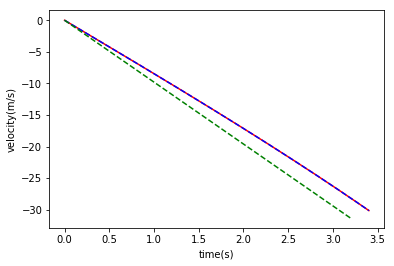

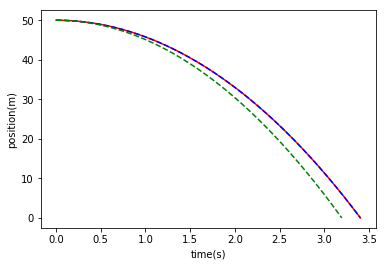

In [2]:
# challenge problem 2.3 part 1
# matplotlib inline
import numpy as np
from matplotlib import pyplot


class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
   # def euler(self, f, dt):
    #    self.y = self.y + self.v*dt
    #    self.v = self.v + f/(self.mass*(1+(self.y/self.RE))**2)*dt
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt



g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 50.          # initial position
v0 = 0.            # initial velocity
R = 637       # Radius of earth
dt = 0.00005           # time step
gforce = g*mass        # weight



# For modified gravity = mg/(1+y/R)^2 with euler function
p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    fy = -gforce/(1+(p.y/R))**2
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

# For modified gravity = mg/(1+y/R)^2 with euler_cromer function
q = particle(mass, y0, v0)

y1 = [y0] # since we do not know the size of the arrays, we define first a python list
v1 = [v0] # the append method is more efficient for lists than arrays
t1 = [0.]

while q.y > 0.:
    fy1 = -gforce/(1+(q.y/R))**2
    q.euler_cromer(fy1, dt)
    y1.append(q.y)
    v1.append(q.v)
    t1.append(t1[-1]+dt)
    
t1_data = np.array(t1) # we convert the list into a numpy array for plotting
y1_data = np.array(y1)
v1_data = np.array(v1)

# For gravity = mg with euler function
z = particle(mass, y0, v0)

y2 = [y0] # since we do not know the size of the arrays, we define first a python list
v2 = [v0] # the append method is more efficient for lists than arrays
t2 = [0.]

while z.y > 0.:
    fy2 = -gforce
    z.euler_cromer(fy2, dt)
    y2.append(z.y)
    v2.append(z.v)
    t2.append(t2[-1]+dt)
    
t2_data = np.array(t2) # we convert the list into a numpy array for plotting
y2_data = np.array(y2)
v2_data = np.array(v2)



print("final velocity for modified weight by Euler method","{0:.3f}".format(v_data[v_data.size -1]), "m/s")
print("final velocity for modified weight by Euler_cromer method","{0:.3f}".format(v1_data[v1_data.size -1]), "m/s")
print("final velocity for mg by Euler method","{0:.3f}".format(v2_data[v2_data.size -1]), "m/s")

pyplot.plot(t_data, v_data, 'r-', label='V(t) by euler function')
pyplot.plot(t1_data, v1_data, 'b--', label='V(t) by euler_cromer function')
pyplot.plot(t2_data, v2_data, 'g--', label='V(t) for mg')
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)')
pyplot.show()

pyplot.plot(t_data, y_data, 'r-', label='y(t) by euler function')
pyplot.plot(t1_data, y1_data, 'b--', label='y(t) by euler_cromer function')
pyplot.plot(t2_data, y2_data, 'g--', label='y(t) for mg')
pyplot.ylabel('position(m)')
pyplot.xlabel('time(s)')
pyplot.show()



Range of initial height y0 upto 1% uncertainty from theoretical y0 is 12.847 m to 13.099 m where differences in % are 0.990 % to 1.010 %
Initial height y0 upto 0.1% uncertainty from theoretical y0 is 12.973 m where differences in % is 1.000 %


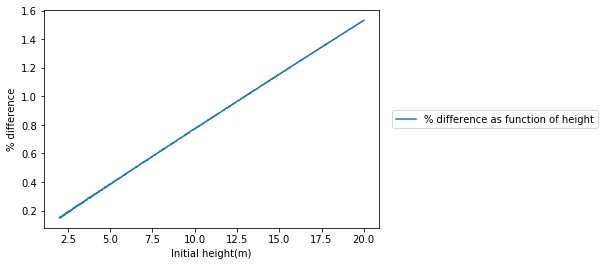

In [7]:
# challenge problem 2.3 part 2
# matplotlib inline
import numpy as np
from matplotlib import pyplot


class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
   # def euler(self, f, dt):
    #    self.y = self.y + self.v*dt
    #    self.v = self.v + f/(self.mass*(1+(self.y/self.RE))**2)*dt
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt

y0_list = np.linspace(2,20,1000)
y0_allowed_fine = []
y0_allowed_coarse = []
diff_fine = []
diff_coarse = []
diff_list = []

for i in range(0,len(y0_list)):
    g = 9.8            # g acceleration
    mass = 0.01        # mass of the particle
    y0 = y0_list[i]          # initial position
    v0 = 0.            # initial velocity
    R = 637       # Radius of earth
    dt = 0.00005           # time step
    gforce = g*mass        # weight

    # For modified gravity = mg/(1+y/R)^2 with euler function
    p = particle(mass, y0, v0)

    y = [y0] # since we do not know the size of the arrays, we define first a python list
    v = [v0] # the append method is more efficient for lists than arrays
    t = [0.]

    while p.y > 0.:
        fy = -gforce/(1+(p.y/R))**2
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)

    t_data = np.array(t) # we convert the list into a numpy array for plotting
    y_data = np.array(y)
    v_data = np.array(v)

    # For modified gravity = mg/(1+y/R)^2 with euler_cromer function
    q = particle(mass, y0, v0)

    y1 = [y0] # since we do not know the size of the arrays, we define first a python list
    v1 = [v0] # the append method is more efficient for lists than arrays
    t1 = [0.]

    while q.y > 0.:
        fy1 = -gforce/(1+(q.y/R))**2
        q.euler_cromer(fy1, dt)
        y1.append(q.y)
        v1.append(q.v)
        t1.append(t1[-1]+dt)

    t1_data = np.array(t1) # we convert the list into a numpy array for plotting
    y1_data = np.array(y1)
    v1_data = np.array(v1)

    # For gravity = mg with euler function
    z = particle(mass, y0, v0)

    y2 = [y0] # since we do not know the size of the arrays, we define first a python list
    v2 = [v0] # the append method is more efficient for lists than arrays
    t2 = [0.]

    while z.y > 0.:
        fy2 = -gforce
        z.euler_cromer(fy2, dt)
        y2.append(z.y)
        v2.append(z.v)
        t2.append(t2[-1]+dt)

    t2_data = np.array(t2) # we convert the list into a numpy array for plotting
    y2_data = np.array(y2)
    v2_data = np.array(v2)

    # difference between final velocities by both methods
    diff = v2_data[v2_data.size -1] - v_data[v_data.size -1]
    diff_per = diff*100/v2_data[v2_data.size -1]
    diff_list.append(diff_per)
    
    # choose allowed y0 upto 1% uncertainty from theoretical y0
    if abs(diff_per-1)<10**(-2):
        y0_allowed_coarse.append(y0_list[i])
        diff_coarse.append(diff_per)
    # choose allowed y0 upto 0.1% uncertainty from theoretical y0    
    if abs(diff_per-1)<10**(-3):
        y0_allowed_fine.append(y0_list[i])
        diff_fine.append(diff_per)
        
print("Range of initial height y0 upto 1% uncertainty from theoretical y0 is","{0:.3f}".format(y0_allowed_coarse[0]),"m to","{0:.3f}".format(y0_allowed_coarse[len(y0_allowed_coarse)-1]), "m where differences in % are","{0:.3f}".format(diff_coarse[0]),"% to", "{0:.3f}".format(diff_coarse[len(diff_coarse)-1]),"%")
print("Initial height y0 upto 0.1% uncertainty from theoretical y0 is","{0:.3f}".format(y0_allowed_fine[0]), "m where differences in % is", "{0:.3f}".format(diff_fine[0]),"%")


diff_array = np.array(diff_list)
y0_array = np.array(y0_list)
pyplot.plot(y0_array, diff_array, label ='% difference as function of height')
pyplot.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
pyplot.xlabel('Initial height(m)')
pyplot.ylabel('% difference')
pyplot.show()